In [1]:
from google.cloud import bigquery
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [2]:
client = bigquery.Client()

query="""
SELECT * from goldenfleece.sentiment.daily_sentiment_2020_covid_theme
"""
tone_df = client.query(query).to_dataframe()
tone_df.head()

,DATE,AVG_TONE,AVG_POSITIVE_SCORE,AVG_NEGATIVE_SCORE,AVG_POLARITY,NUMBER_OF_ARTICLES
0,20200101,-6.017551457,2.149165089,8.166716546,10.315881635,18
1,20200102,-5.378190877,1.556339353,6.934530230,8.490869583,50
2,20200103,-5.884740139,1.721482468,7.606222607,9.327705075,40
3,20200104,-5.213566203,2.195057625,7.408623828,9.603681452,42
4,20200105,-5.526246926,1.687839156,7.214086083,8.901925239,18


In [3]:
tone_df = tone_df.astype({"DATE":"datetime64", "AVG_TONE":float, "AVG_POSITIVE_SCORE":float, "AVG_NEGATIVE_SCORE":float, "AVG_POLARITY":float}).set_index("DATE")
tone_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 330 entries, 2020-01-01 to 2020-11-25
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AVG_TONE            330 non-null    float64
 1   AVG_POSITIVE_SCORE  330 non-null    float64
 2   AVG_NEGATIVE_SCORE  330 non-null    float64
 3   AVG_POLARITY        330 non-null    float64
 4   NUMBER_OF_ARTICLES  330 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 15.5 KB


array([<AxesSubplot:xlabel='DATE'>, <AxesSubplot:xlabel='DATE'>,
       <AxesSubplot:xlabel='DATE'>, <AxesSubplot:xlabel='DATE'>],
      dtype=object)

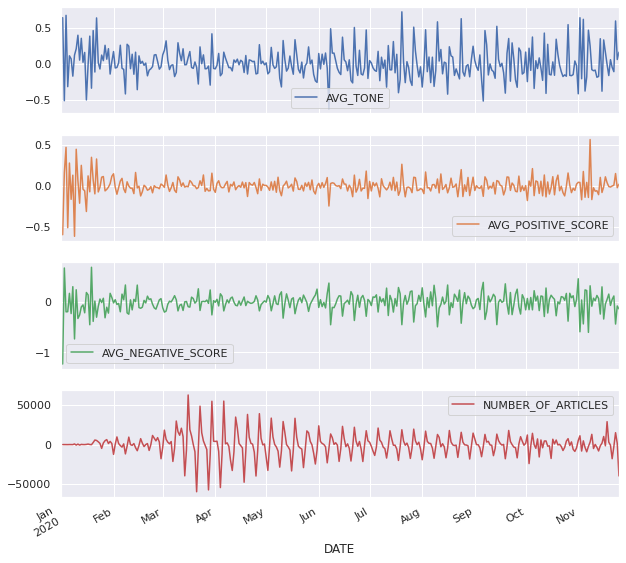

In [4]:
tone_diff = tone_df[["AVG_TONE", "AVG_POSITIVE_SCORE", "AVG_NEGATIVE_SCORE", "NUMBER_OF_ARTICLES"]].diff()
tone_diff.plot(subplots=True, figsize=(10,10))

In [5]:
query="""
SELECT * from goldenfleece.sentiment.ftse100 order by Date
"""
ftse_df = client.query(query).to_dataframe()
ftse_df.head()

,Date,Open,High,Low,Close,Adj_Close,Volume
0,2019-09-20,7356.399902,7376.299805,7322.000000,7344.899902,7344.899902,1656288000
1,2019-09-23,7344.899902,7362.299805,7284.799805,7326.100098,7326.100098,489660300
2,2019-09-24,7326.100098,7349.000000,7281.899902,7291.399902,7291.399902,588772200
3,2019-09-25,7291.399902,7292.000000,7213.000000,7290.000000,7290.000000,704553100
4,2019-09-26,7290.000000,7387.100098,7277.200195,7351.100098,7351.100098,704707500


In [6]:
ftse_df = ftse_df.astype({"Date":"datetime64"}).set_index("Date") 
ftse_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 300 entries, 2019-09-20 to 2020-11-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       300 non-null    float64
 1   High       300 non-null    float64
 2   Low        300 non-null    float64
 3   Close      300 non-null    float64
 4   Adj_Close  300 non-null    float64
 5   Volume     300 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 16.4 KB


<AxesSubplot:xlabel='Date'>

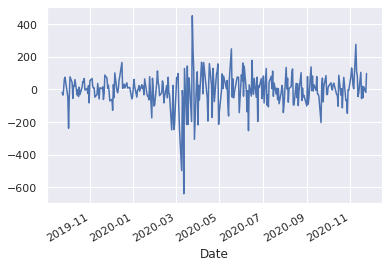

In [7]:
ftse_adj_close = ftse_df.sort_index()["Adj_Close"]
ftse_adj_close_diff = ftse_adj_close.diff().rename("FTSE")
ftse_adj_close_diff.plot()

In [8]:
import yfinance as yf

lbg_df = yf.download("LLOY.L", start="2020-01-01", end="2020-11-24", interval='1d')

[*********************100%***********************]  1 of 1 completed


In [9]:
lbg_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 228 entries, 2020-01-02 to 2020-11-23
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       228 non-null    float64
 1   High       228 non-null    float64
 2   Low        228 non-null    float64
 3   Close      228 non-null    float64
 4   Adj Close  228 non-null    float64
 5   Volume     228 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 12.5 KB


<AxesSubplot:xlabel='Date'>

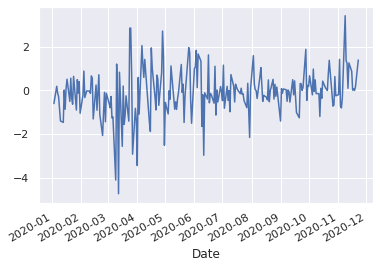

In [10]:
lbg_adj_close = lbg_df.sort_index()["Adj Close"]
lbg_adj_close_diff = lbg_adj_close.diff().rename("LBG")
lbg_adj_close_diff.plot()

In [11]:
merged_df = tone_diff.merge(ftse_adj_close_diff, left_index=True, right_index=True).merge(lbg_adj_close_diff, left_index=True, right_index=True)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 228 entries, 2020-01-02 to 2020-11-23
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AVG_TONE            228 non-null    float64
 1   AVG_POSITIVE_SCORE  228 non-null    float64
 2   AVG_NEGATIVE_SCORE  228 non-null    float64
 3   NUMBER_OF_ARTICLES  228 non-null    float64
 4   FTSE                228 non-null    float64
 5   LBG                 227 non-null    float64
dtypes: float64(6)
memory usage: 12.5 KB


In [12]:
merged_df.corr(method="pearson")

,AVG_TONE,AVG_POSITIVE_SCORE,AVG_NEGATIVE_SCORE,NUMBER_OF_ARTICLES,FTSE,LBG
AVG_TONE,1.000000,0.468815,-0.862535,0.374763,0.159766,0.068079
AVG_POSITIVE_SCORE,0.468815,1.000000,0.042576,0.162567,0.058615,-0.015962
AVG_NEGATIVE_SCORE,-0.862535,0.042576,1.000000,-0.330767,-0.147133,-0.092757
NUMBER_OF_ARTICLES,0.374763,0.162567,-0.330767,1.000000,-0.007585,-0.060773
FTSE,0.159766,0.058615,-0.147133,-0.007585,1.000000,0.777498
LBG,0.068079,-0.015962,-0.092757,-0.060773,0.777498,1.000000


In [13]:
merged_df.corr(method="pearson")[["LBG", "FTSE"]].drop(index=["LBG", "FTSE"])

,LBG,FTSE
AVG_TONE,0.068079,0.159766
AVG_POSITIVE_SCORE,-0.015962,0.058615
AVG_NEGATIVE_SCORE,-0.092757,-0.147133
NUMBER_OF_ARTICLES,-0.060773,-0.007585


#### Take the first difference of each time series and calculate correlation

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


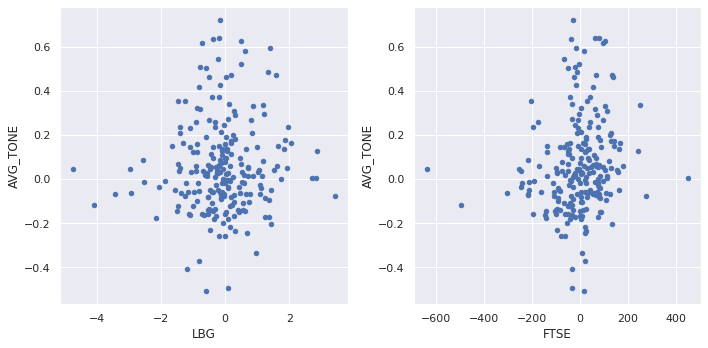

In [14]:
fig, axes = plt.subplots(1,2, figsize=(10,5))
merged_df.plot.scatter(x="LBG", y="AVG_TONE", ax=axes[0])
merged_df.plot.scatter(x="FTSE", y="AVG_TONE", ax=axes[1])
plt.tight_layout()

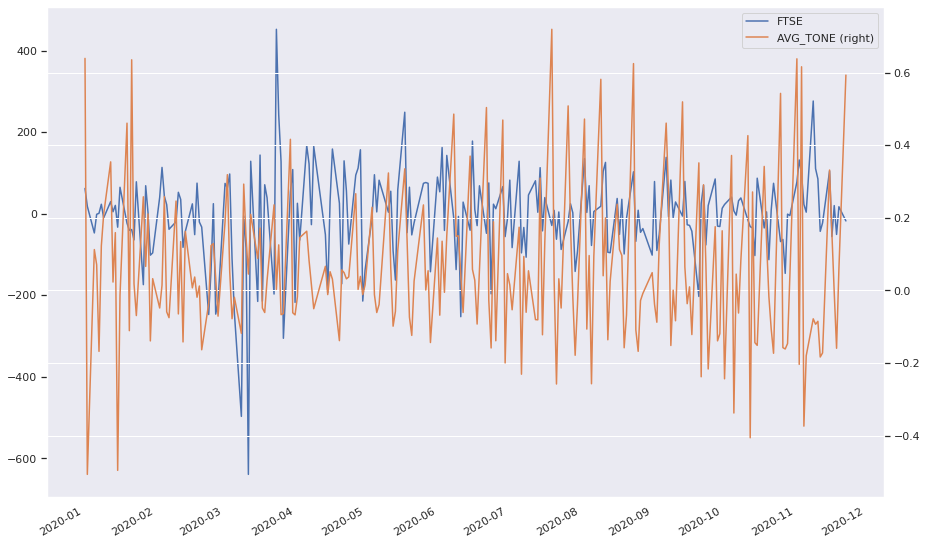

In [15]:
ax = merged_df[["FTSE", "AVG_TONE"]].plot(secondary_y="AVG_TONE", figsize=(15,10))

In [16]:
def crosscorr(datax, datay, lag=0):
    """ Lag-N cross correlation. 
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length

    Returns
    ----------
    crosscorr : float
    """
    return datax.corr(datay.shift(lag))

ftse_tone_cross_correlation = {lag:crosscorr(merged_df["AVG_TONE"], merged_df["FTSE"], lag) for lag in range(-10, 10)}
lbg_tone_cross_correlation = {lag:crosscorr(merged_df["AVG_TONE"], merged_df["LBG"], lag) for lag in range(-10, 10)}

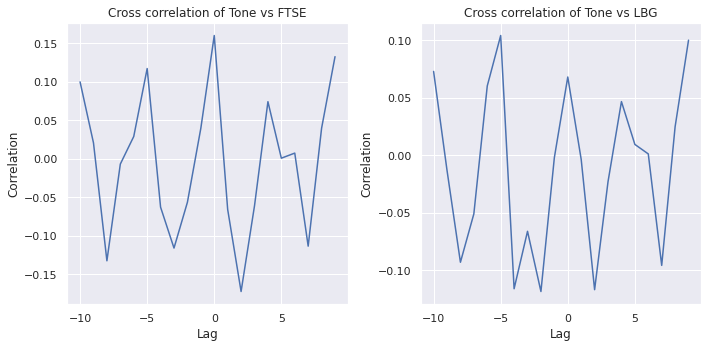

In [17]:
fig, axes = plt.subplots(1,2, figsize=(10,5))

pd.Series(ftse_tone_cross_correlation).plot(title="Cross correlation of Tone vs FTSE", xlabel="Lag", ylabel="Correlation", ax=axes[0])
pd.Series(lbg_tone_cross_correlation).plot(title="Cross correlation of Tone vs LBG", xlabel="Lag", ylabel="Correlation", ax=axes[1])

plt.tight_layout()